In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("E:\Python All in One\DATA_SETS\Machine Learning A-Z Template Folder\Part 4 - Clustering\Section 24 - K-Means Clustering\K_Means\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
pd.isnull(data).any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
#Now we need to cluster our customers on the basis of their annual income and find the number of clusters using k-means

#Separating the feature
x = data.iloc[:, 3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

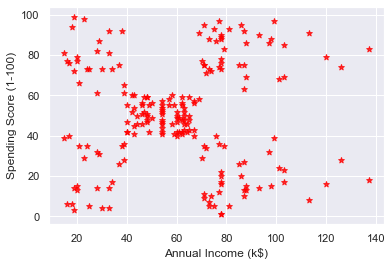

In [6]:
sns.regplot(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], fit_reg = False, color = "red",marker = "*")

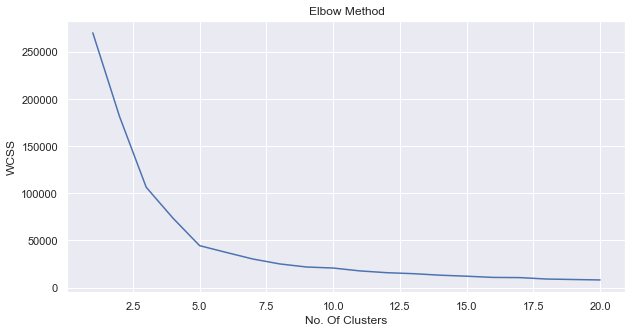

In [7]:
#Building our models
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
pt.figure(figsize = (10,5))
pt.plot(range(1, 21), wcss)
pt.xlabel("No. Of Clusters")
pt.ylabel("WCSS")
pt.title("Elbow Method")


pt.show()

# We get Number of Clusters from elbow method = 5

In [8]:
#Clustering our dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(x)

In [9]:
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

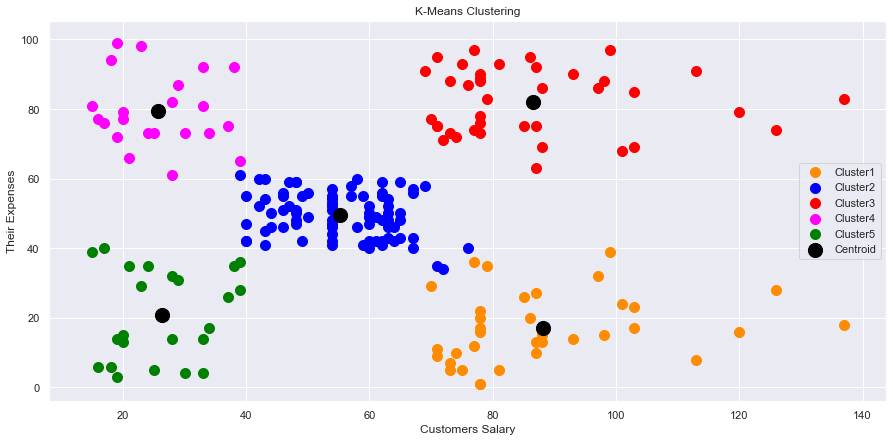

In [10]:
#Visualizing our dataset
pt.figure(figsize = (15, 7))
pt.scatter(x = x[clusters==0, 0], y = x[clusters == 0, 1],  color = 'darkorange', label = 'Cluster1', s = 100)
pt.scatter(x = x[clusters==1, 0], y = x[clusters == 1, 1],  color = 'Blue', label = 'Cluster2', s = 100)
pt.scatter(x = x[clusters==2, 0], y = x[clusters == 2, 1],  color = 'red', label = 'Cluster3', s = 100)
pt.scatter(x = x[clusters==3, 0], y = x[clusters == 3, 1],  color = 'magenta', label = 'Cluster4', s = 100)
pt.scatter(x = x[clusters==4, 0], y = x[clusters == 4, 1],  color = 'green', label = 'Cluster5', s = 100)
pt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color = 'black', label = 'Centroid', s = 200 )
pt.xlabel("Customers Salary")
pt.ylabel("Their Expenses")
pt.title("K-Means Clustering")
pt.legend()
pt.show()

In [12]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])